In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

2018 data(first 6 months)

In [ ]:
df1 = pd.read_csv('/content/dfm_ready.csv')
df1.head(2)

,Unnamed: 0,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,0,-5.0,268.0,225.0,1605.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,-8.0,99.0,65.0,414.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


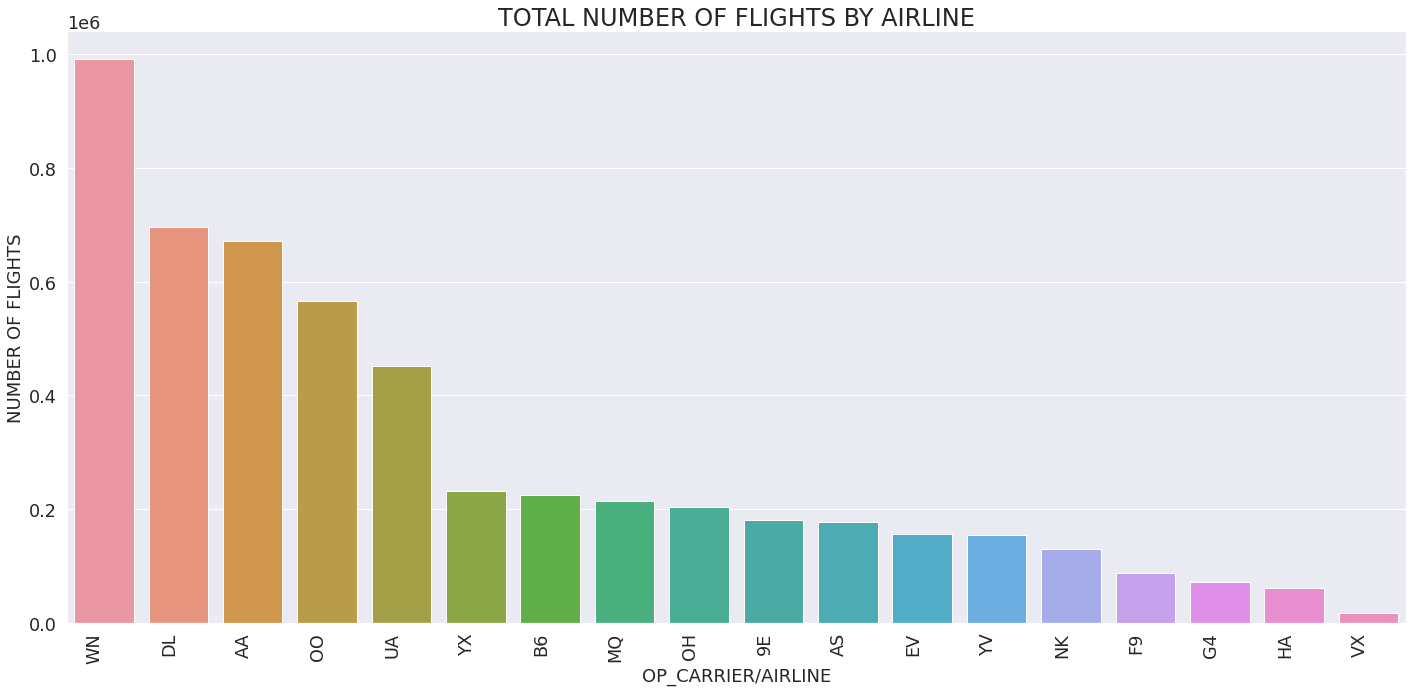

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
df1.shape

(3208353, 28)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3208353 entries, 0 to 3208352
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

### OP_CARRIER

In [ ]:
df1.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [ ]:
df1['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [ ]:
df1.OP_CARRIER.nunique()

18

In [ ]:
df1.OP_CARRIER.value_counts()

Southwest Airlines    607851
Delta Airlines        418139
American Airlines     408852
SkyWest Airlines      341346
United Airlines       264789
Republic Airways      141818
JetBlue Airways       138633
Envoy Air             129203
PSA Airlines          125067
Endeavor Air          109007
ExpressJet            101846
Alaska Airlines       101054
Mesa Airline           90125
Spirit Airlines        79091
Frontier Airlines      52809
Allegiant Air          44116
Hawaiian Airlines      36937
Virgin America         17670
Name: OP_CARRIER, dtype: int64

dropped unnamed columns as almost all of it's values are missing

In [ ]:
df1 = df1.drop(["Unnamed: 27"], axis=1)

### CANCELLED

In [ ]:
df1.CANCELLED.nunique()

2

In [ ]:
df1.CANCELLED.value_counts()

0.0    3148009
1.0      60343
Name: CANCELLED, dtype: int64

In [ ]:
dummy = df1[(df1['CANCELLED'] == 1)]
print('dummy shape:', dummy.shape)
print('====================================')
print('dummy dataframe:')
dummy.head(3).append(dummy.tail(3))

dummy shape: (60343, 27)
dummy dataframe:


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.0,B,0.0,81.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN
875,2018-01-01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.0,A,0.0,102.0,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.0,B,0.0,78.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN
3208348,2018-06-15,PSA Airlines,5707,MEM,ORD,1223,NaN,NaN,NaN,NaN,NaN,NaN,1416,NaN,NaN,1.0,A,0.0,113.0,NaN,NaN,491.0,NaN,NaN,NaN,NaN,NaN
3208349,2018-06-15,PSA Airlines,5707,ORD,MEM,1010,NaN,NaN,NaN,NaN,NaN,NaN,1147,NaN,NaN,1.0,A,0.0,97.0,NaN,NaN,491.0,NaN,NaN,NaN,NaN,NaN
3208350,2018-06-15,PSA Airlines,5708,IAD,CLT,512,NaN,NaN,NaN,NaN,NaN,NaN,631,NaN,NaN,1.0,A,0.0,79.0,NaN,NaN,322.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dummy.CANCELLED.nunique()

1

In [ ]:
dummy.CANCELLED.value_counts()

1.0    60343
Name: CANCELLED, dtype: int64

In [ ]:
df1 = df1[(df1['CANCELLED'] == 0)]
df1.head(2)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df1.drop(['CANCELLED'], axis = 1) 

In [ ]:
df1.shape

(3148009, 26)

### CANCELLATION CODE

In [ ]:
df1.CANCELLATION_CODE.nunique()

0

In [ ]:
df1.CANCELLATION_CODE.value_counts()

Series([], Name: CANCELLATION_CODE, dtype: int64)

In [ ]:
df1.CANCELLATION_CODE.unique()

array([nan], dtype=object)

In [ ]:
CC_A = df1['CANCELLATION_CODE'] == 'A'
CC_B = df1['CANCELLATION_CODE'] == 'B'
CC_C = df1['CANCELLATION_CODE'] == 'C'
CC_D = df1['CANCELLATION_CODE'] == 'D'

In [ ]:
df1_CC_A = df1[CC_A]
df1_CC_B = df1[CC_B]
df1_CC_C = df1[CC_C]
df1_CC_D = df1[CC_D]
print('df1_CC_A shape:', df1_CC_A.shape)
print('df1_CC_B shape:', df1_CC_B.shape)
print('df1_CC_C shape:', df1_CC_C.shape)
print('df1_CC_D shape:', df1_CC_D.shape)

df1_CC_A shape: (0, 26)
df1_CC_B shape: (0, 26)
df1_CC_C shape: (0, 26)
df1_CC_D shape: (0, 26)


In [ ]:
# df1 = df1.drop(["CANCELLATION_CODE"], axis=1)

KeyError: ignored

IATA airline code

In [ ]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [ ]:
airports.shape

(322, 7)

In [ ]:
len(airports.IATA_CODE.unique())

322

In [ ]:
airport_IATA_CODE = list(airports['IATA_CODE'])

In [ ]:
len(airport_IATA_CODE)

322

In [ ]:
df1.ORIGIN.unique()

array(['EWR', 'LAS', 'SNA', 'RSW', 'ORD', 'IAH', 'DEN', 'SMF', 'RIC',
       'PDX', 'MCO', 'TYS', 'SFO', 'JAC', 'BOS', 'MSY', 'MIA', 'SEA',
       'SAT', 'SLC', 'RDU', 'FLL', 'IAD', 'DFW', 'ANC', 'MSP', 'ALB',
       'LAX', 'IND', 'SAN', 'BNA', 'BDL', 'ABQ', 'SAV', 'PHX', 'AUS',
       'PHL', 'SJC', 'ORF', 'DCA', 'LGA', 'BWI', 'PIT', 'OGG', 'CLE',
       'TPA', 'MYR', 'ROC', 'SJU', 'EGE', 'HNL', 'ONT', 'PBI', 'MKE',
       'HDN', 'JAX', 'OKC', 'ATL', 'SRQ', 'BZN', 'EUG', 'BOI', 'RNO',
       'GEG', 'TUS', 'LIH', 'KOA', 'ITO', 'PSP', 'DTW', 'GUC', 'OMA',
       'MTJ', 'CLT', 'CHS', 'MCI', 'BIL', 'CVG', 'CID', 'MEM', 'AVL',
       'BUF', 'GUM', 'JFK', 'ADQ', 'BET', 'SCC', 'BRW', 'FAI', 'JNU',
       'KTN', 'SIT', 'PSG', 'OME', 'OTZ', 'BUR', 'OAK', 'BLI', 'SBA',
       'STL', 'GFK', 'SYR', 'GSP', 'FSD', 'DSM', 'ILM', 'PWM', 'BIS',
       'JAN', 'GRB', 'OAJ', 'BTV', 'TLH', 'LAN', 'MSN', 'BMI', 'BGR',
       'ABY', 'MOT', 'DHN', 'LEX', 'MDT', 'CMH', 'FSM', 'HSV', 'FAR',
       'BQK', 'GSO',

In [ ]:
df1_ORIGIN = df1.ORIGIN.unique()
df1_DEST = df1.DEST.unique()

In [ ]:
print(type(df1_ORIGIN))
print(type(df1_DEST))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
df1_ORIGIN = df1_ORIGIN.tolist()
df1_DEST = df1_DEST.tolist()

In [ ]:
print(type(df1_ORIGIN))
print(type(df1_DEST))

<class 'list'>
<class 'list'>


In [ ]:
print(len(df1_ORIGIN))
print(len(df1_DEST))

351
351


In [ ]:
# differences between df1_ORIGIN and airport_IATA_CODE
difference_1 = [item for item in airport_IATA_CODE if item not in df1_ORIGIN]
difference_1

['CEC', 'CLD', 'DIK', 'ILG', 'UST', 'VEL']

In [ ]:
difference_2 = [item for item in df1_ORIGIN if item not in airport_IATA_CODE]
difference_2

['SFB',
 'PIE',
 'BLV',
 'HGR',
 'RFD',
 'OWB',
 'HTS',
 'PGD',
 'USA',
 'LCK',
 'AZA',
 'OGD',
 'PVU',
 'YNG',
 'SCK',
 'SWO',
 'HVN',
 'STS',
 'IFP',
 'CKB',
 'CGI',
 'UIN',
 'PSM',
 'OGS',
 'LYH',
 'BFF',
 'LBF',
 'LBL',
 'FLO',
 'PGV',
 'LWB',
 'SHD',
 'SLN',
 'SPN',
 'BKG']

In [ ]:
len(difference_2)

35

In [ ]:
difference_3 = [item for item in df1_DEST if item not in airport_IATA_CODE]
difference_4 = [item for item in airport_IATA_CODE if item not in df1_DEST]
print(type(difference_3))
print(type(difference_4))

<class 'list'>
<class 'list'>


In [ ]:
print(difference_1)
print(difference_4)

['CEC', 'CLD', 'DIK', 'ILG', 'UST', 'VEL']
['CEC', 'CLD', 'DIK', 'ILG', 'UST', 'VEL']


In [ ]:
difference_2_3 = [item for item in difference_2 if item not in difference_3]
difference_2_3

[]

In [ ]:
missing_airports = pd.DataFrame(difference_2, columns=['IATA_CODE'])
print('missing_airports type is:', type(missing_airports))
print('===============================================================')
print('Dataframe difference_2 shape:', missing_airports.shape)
print('===============================================================')
missing_airports.head(3).append(missing_airports.tail(3))

missing_airports type is: <class 'pandas.core.frame.DataFrame'>
Dataframe difference_2 shape: (35, 1)


,IATA_CODE
0,SFB
1,PIE
2,BLV
32,SLN
33,SPN
34,BKG


In [ ]:
missing_airports.to_csv('missing_airports.csv')

In [ ]:
missing_airports = pd.read_csv('missing_airports.csv', index_col=0)
print(missing_airports.shape)
missing_airports.head(3).append(missing_airports.tail(2))

(35, 1)


,IATA_CODE
0,SFB
1,PIE
2,BLV
33,SPN
34,BKG


In [ ]:
print(airports.shape)
airports.head(3)

(322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


In [ ]:
airports = airports[airports.IATA_CODE != 'CEC']
airports = airports[airports.IATA_CODE != 'CLD']
airports = airports[airports.IATA_CODE != 'DIK']
airports = airports[airports.IATA_CODE != 'ILG']
airports = airports[airports.IATA_CODE != 'UST']
airports = airports[airports.IATA_CODE != 'VET']

In [ ]:
airports.shape

(317, 7)

In [ ]:
# Appending the missing_airports dataframe to the larger airports dataframe
AIRPORTS = airports.append(missing_airports, ignore_index=True)
AIRPORTS.shape

(352, 7)

In [ ]:
AIRPORTS.head(2).append(AIRPORTS.tail(2))

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.6819
350,SPN,NaN,NaN,NaN,NaN,NaN,NaN
351,BKG,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Number of cities with at least one airport:', AIRPORTS.CITY.nunique())
print('================================================')
print('Total number of airports:', AIRPORTS.IATA_CODE.nunique())
print('================================================')

Number of cities with at least one airport: 305
Total number of airports: 352


In [ ]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(AIRPORTS.CITY.values, index=AIRPORTS.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [ ]:
df1['ORIGIN'].replace(airport_dict, inplace=True)
df1['DEST'].replace(airport_dict, inplace=True)
df1.head(3).append(df1.tail(3))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3208341,2018-06-15,PSA Airlines,5700,Charlotte,Manchester,2209,35.0,146.0,13.0,48.0,234.0,10.0,10,244.0,154.0,0.0,121.0,129.0,106.0,737.0,79.0,0.0,8.0,0.0,67.0
3208344,2018-06-15,PSA Airlines,5703,Charlotte,Birmingham,1306,1334.0,28.0,12.0,1346.0,1349.0,3.0,1325,1352.0,27.0,0.0,79.0,78.0,63.0,350.0,27.0,0.0,0.0,0.0,0.0
3208351,2018-06-15,PSA Airlines,5709,Charlotte,Valparaiso,1749,1812.0,23.0,25.0,1837.0,1848.0,12.0,1823,1900.0,37.0,0.0,94.0,108.0,71.0,460.0,23.0,0.0,14.0,0.0,0.0


In [ ]:
print('Total number of departure/origin cities:', df1.ORIGIN.nunique())
print('==================================================')
print('Total number of arrivals/destinations cities:', df1.DEST.nunique())
print('==================================================')

Total number of departure/origin cities: 304
Total number of arrivals/destinations cities: 304


### DIVERTED

In [ ]:
df1.DIVERTED.value_counts()

0.0    3140523
1.0       7486
Name: DIVERTED, dtype: int64

In [ ]:
DIVERTED_1 = df1['DIVERTED']==1

In [ ]:
df1_DIV = df1[DIVERTED_1]
print(df1_DIV.shape)

(7486, 25)


In [ ]:
df1_DIV.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1168,2018-01-01,United Airlines,555,San Francisco,San Diego,729,718.0,-11.0,17.0,735.0,1124.0,3.0,903,1127.0,NaN,1.0,94.0,NaN,NaN,447.0,NaN,NaN,NaN,NaN,NaN
1638,2018-01-01,Alaska Airlines,64,Petersburg,Wrangell,1514,1626.0,72.0,20.0,1646.0,NaN,NaN,1538,NaN,NaN,1.0,24.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN
1643,2018-01-01,Alaska Airlines,65,Ketchikan,Wrangell,925,918.0,-7.0,26.0,944.0,NaN,NaN,1011,NaN,NaN,1.0,46.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
1683,2018-01-01,Alaska Airlines,120,Seattle,San Diego,550,544.0,-6.0,18.0,602.0,1046.0,3.0,840,1049.0,NaN,1.0,170.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN
1850,2018-01-01,Alaska Airlines,512,Seattle,San Diego,725,722.0,-3.0,16.0,738.0,1216.0,3.0,1017,1219.0,NaN,1.0,172.0,NaN,NaN,1050.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1_DIV.ARR_DELAY.nunique()

0

In [ ]:
df1_DIV.ARR_DELAY.unique()

array([nan])

In [ ]:
df1_DIV.AIR_TIME.nunique()

0

In [ ]:
df1 = df1.drop(['DIVERTED'], axis=1)
df1.head(3)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(3148009, 24)

### DELAY REASONS

In [ ]:
print(df1.CARRIER_DELAY.isna().sum())
print(df1.WEATHER_DELAY.isna().sum())
print(df1.NAS_DELAY.isna().sum())
print(df1.SECURITY_DELAY.isna().sum())
print(df1.LATE_AIRCRAFT_DELAY.isna().sum())

2574581
2574581
2574581
2574581
2574581


In [ ]:
print("Percentage of valid data:", 100 - (df1.CARRIER_DELAY.isna().sum()*100/len(df1)))
print("Percentage of missing values:", (df1.CARRIER_DELAY.isna().sum()*100/len(df1)))

Percentage of valid data: 18.215576893204556
Percentage of missing values: 81.78442310679544


In [ ]:
df1 = df1.drop(['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print('The current shape of df1 is:', df1.shape)
df1.head(3).append(df1.tail(3))

The current shape of df1 is: (3148009, 19)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,2429,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,2427,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0
2,2018-01-01,United Airlines,2426,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0
3208341,2018-06-15,PSA Airlines,5700,Charlotte,Manchester,2209,35.0,146.0,13.0,48.0,234.0,10.0,10,244.0,154.0,121.0,129.0,106.0,737.0
3208344,2018-06-15,PSA Airlines,5703,Charlotte,Birmingham,1306,1334.0,28.0,12.0,1346.0,1349.0,3.0,1325,1352.0,27.0,79.0,78.0,63.0,350.0
3208351,2018-06-15,PSA Airlines,5709,Charlotte,Valparaiso,1749,1812.0,23.0,25.0,1837.0,1848.0,12.0,1823,1900.0,37.0,94.0,108.0,71.0,460.0


### OP_CARRIER_FL_NUM

In [ ]:
df1 = df1.drop(['OP_CARRIER_FL_NUM'], axis=1)
df1.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,Newark,Denver,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0
2,2018-01-01,United Airlines,Santa Ana,Denver,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0


In [ ]:
df1.drop(columns=['DEP_TIME', 'ARR_TIME'], inplace=True)
df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,Newark,Denver,1517,-5.0,15.0,1527.0,1712.0,10.0,1745,-23.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,1115,-8.0,11.0,1118.0,1223.0,7.0,1254,-24.0,99.0,83.0,65.0,414.0


In [ ]:
df1.to_csv('df_afterpreprocess.csv')

In [ ]:
df1.info

<bound method DataFrame.info of             FL_DATE       OP_CARRIER     ORIGIN           DEST  CRS_DEP_TIME  \
0        2018-01-01  United Airlines     Newark         Denver          1517   
1        2018-01-01  United Airlines  Las Vegas  San Francisco          1115   
2        2018-01-01  United Airlines  Santa Ana         Denver          1335   
3        2018-01-01  United Airlines  Ft. Myers        Chicago          1546   
4        2018-01-01  United Airlines    Chicago         Albany           630   
...             ...              ...        ...            ...           ...   
3208335  2018-06-15     PSA Airlines  Charlotte     Valparaiso          2234   
3208338  2018-06-15     PSA Airlines  Charlotte            NaN          1800   
3208341  2018-06-15     PSA Airlines  Charlotte     Manchester          2209   
3208344  2018-06-15     PSA Airlines  Charlotte     Birmingham          1306   
3208351  2018-06-15     PSA Airlines  Charlotte     Valparaiso          1749   

       

### Now dealing with missing values

In [ ]:
df1.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                 20703
DEST                   20739
CRS_DEP_TIME               0
DEP_DELAY               3150
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON               1425
TAXI_IN                 1425
CRS_ARR_TIME               0
ARR_DELAY               9164
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME     7487
AIR_TIME                7487
DISTANCE                   0
dtype: int64

In [ ]:
print('Number of total missing values:', df1.isna().sum().sum())
print('df1 shape:', df1.shape)

Number of total missing values: 71587
df1 shape: (3148009, 16)


In [ ]:
df_NaN = df1.loc[df1.isnull().any(axis=1)]
df_NaN.head(20)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1168,2018-01-01,United Airlines,San Francisco,San Diego,729,-11.0,17.0,735.0,1124.0,3.0,903,NaN,94.0,NaN,NaN,447.0
1638,2018-01-01,Alaska Airlines,Petersburg,Wrangell,1514,72.0,20.0,1646.0,NaN,NaN,1538,NaN,24.0,NaN,NaN,31.0
1643,2018-01-01,Alaska Airlines,Ketchikan,Wrangell,925,-7.0,26.0,944.0,NaN,NaN,1011,NaN,46.0,NaN,NaN,82.0
1683,2018-01-01,Alaska Airlines,Seattle,San Diego,550,-6.0,18.0,602.0,1046.0,3.0,840,NaN,170.0,NaN,NaN,1050.0
1850,2018-01-01,Alaska Airlines,Seattle,San Diego,725,-3.0,16.0,738.0,1216.0,3.0,1017,NaN,172.0,NaN,NaN,1050.0
1886,2018-01-01,Alaska Airlines,Portland,San Diego,625,6.0,17.0,648.0,1147.0,4.0,852,NaN,147.0,NaN,NaN,933.0
1958,2018-01-01,Alaska Airlines,Salt Lake City,San Diego,600,-6.0,31.0,625.0,1031.0,3.0,708,NaN,128.0,NaN,NaN,626.0
2000,2018-01-01,Alaska Airlines,Baltimore,San Diego,625,1.0,9.0,635.0,1111.0,4.0,905,NaN,340.0,NaN,NaN,2295.0
2102,2018-01-01,Endeavor Air,Cleveland,Detroit,630,-5.0,39.0,704.0,731.0,8.0,739,NaN,69.0,74.0,27.0,95.0
2124,2018-01-01,Endeavor Air,Dallas-Fort Worth,New York,900,NaN,16.0,916.0,1303.0,6.0,1334,-25.0,214.0,189.0,167.0,1391.0


In [ ]:
df_NaN.shape

(49347, 16)

In [ ]:
percentage_NaN = (len(df_NaN)*100)/len(df1)
print('Percentage of rows with at least 1 NaN value:', percentage_NaN)

Percentage of rows with at least 1 NaN value: 1.5675622274269227


In [ ]:
df1["DEP_DELAY"] = df1["DEP_DELAY"].fillna(0)
df1.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                 20703
DEST                   20739
CRS_DEP_TIME               0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON               1425
TAXI_IN                 1425
CRS_ARR_TIME               0
ARR_DELAY               9164
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME     7487
AIR_TIME                7487
DISTANCE                   0
dtype: int64

In [ ]:
df1['TAXI_IN'].fillna((df1['TAXI_IN'].mean()), inplace=True)
df_NaN['TAXI_IN'].fillna((df_NaN['TAXI_IN'].mean()), inplace=True)

In [ ]:
df_NaN.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1168,2018-01-01,United Airlines,San Francisco,San Diego,729,-11.0,17.0,735.0,1124.0,3.000000,903,NaN,94.0,NaN,NaN,447.0
1638,2018-01-01,Alaska Airlines,Petersburg,Wrangell,1514,72.0,20.0,1646.0,NaN,6.981512,1538,NaN,24.0,NaN,NaN,31.0
1643,2018-01-01,Alaska Airlines,Ketchikan,Wrangell,925,-7.0,26.0,944.0,NaN,6.981512,1011,NaN,46.0,NaN,NaN,82.0
1683,2018-01-01,Alaska Airlines,Seattle,San Diego,550,-6.0,18.0,602.0,1046.0,3.000000,840,NaN,170.0,NaN,NaN,1050.0
1850,2018-01-01,Alaska Airlines,Seattle,San Diego,725,-3.0,16.0,738.0,1216.0,3.000000,1017,NaN,172.0,NaN,NaN,1050.0


In [ ]:
df1.TAXI_IN.isna().sum()

0

In [ ]:
df1.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                 20703
DEST                   20739
CRS_DEP_TIME               0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON               1425
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_DELAY               9164
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME     7487
AIR_TIME                7487
DISTANCE                   0
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.shape

(3101709, 16)

In [ ]:
df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
dtype: int64

### Time-related columns
converting time related columns to quarters in the day(1,2,3,4) 

In [ ]:
df1['CRS_DEP_TIME'] = np.ceil(df1['CRS_DEP_TIME']/600).apply(int)
df1['WHEELS_OFF'] = np.ceil(df1['WHEELS_OFF']/600).apply(int) 
df1['WHEELS_ON'] = np.ceil(df1['WHEELS_ON']/600).apply(int)
df1['CRS_ARR_TIME'] = np.ceil(df1['CRS_ARR_TIME']/600).apply(int)

In [ ]:
df1.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0


### Date Format

In [ ]:
df1['DAY'] = pd.DatetimeIndex(df1['FL_DATE']).day
df1['MONTH'] = pd.DatetimeIndex(df1['FL_DATE']).month
df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1


In [ ]:
print('Maximum number of days in a month:', df1.DAY.nunique())
print('Total number of months:', df1.MONTH.nunique())

Maximum number of days in a month: 31
Total number of months: 6


In [ ]:
import calendar
df1['MONTH_AB'] = df1['MONTH'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df1.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan


In [ ]:
print('Months present in dataframe:', df1.MONTH.unique())
print('Months present in dataframe:', df1.MONTH_AB.unique())

Months present in dataframe: [1 2 3 4 5 6]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


### Binary Clasification

In [ ]:
status = []

for value in df1['ARR_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df1['FLIGHT_STATUS'] = status
df1.head(2)  

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0


In [ ]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.636944
1    0.363056
Name: FLIGHT_STATUS, dtype: float64

In [ ]:
df1.to_csv('df1.csv')

In [ ]:
df1.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('df1.csv', index_col=0)
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0
4,2018-01-01,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1,1,Jan,1


In [ ]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [ ]:
df.WEEKDAY.value_counts()

3    471441
0    469997
1    457056
2    455875
4    455838
6    426299
5    365203
Name: WEEKDAY, dtype: int64

In [ ]:
df.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0


In [ ]:
df.DEST.value_counts().iloc[:20]


Chicago              176397
Atlanta              172716
New York             127608
Dallas-Fort Worth    120593
Houston              100843
Denver               100511
Charlotte            100385
Los Angeles           97654
Phoenix               79500
San Francisco         76134
Las Vegas             71830
Detroit               69697
Minneapolis           68199
Orlando               63258
Boston                62865
Newark                62408
Seattle               60068
Arlington             56869
Salt Lake City        50303
Philadelphia          49413
Name: DEST, dtype: int64

In [ ]:
top_cities = df.DEST.value_counts().iloc[0:20].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,Chicago,176397
1,Atlanta,172716
2,New York,127608
3,Dallas-Fort Worth,120593
4,Houston,100843


In [ ]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

array(['Chicago', 'Atlanta', 'New York', 'Dallas-Fort Worth', 'Houston',
       'Denver', 'Charlotte', 'Los Angeles', 'Phoenix', 'San Francisco',
       'Las Vegas', 'Detroit', 'Minneapolis', 'Orlando', 'Boston',
       'Newark', 'Seattle', 'Arlington', 'Salt Lake City', 'Philadelphia'],
      dtype=object)

In [ ]:
# Creating a list with top 20 cities only:
city_list = top_cities['DEST'].tolist()

In [ ]:
city_list

['Chicago',
 'Atlanta',
 'New York',
 'Dallas-Fort Worth',
 'Houston',
 'Denver',
 'Charlotte',
 'Los Angeles',
 'Phoenix',
 'San Francisco',
 'Las Vegas',
 'Detroit',
 'Minneapolis',
 'Orlando',
 'Boston',
 'Newark',
 'Seattle',
 'Arlington',
 'Salt Lake City',
 'Philadelphia']

In [ ]:
boolean_series = df.DEST.isin(city_list)
dfm = df[boolean_series]
dfm.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0,0
3,2018-01-01,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,Jan,0,0
6,2018-01-01,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,Jan,0,0


In [ ]:
dfm.DEST.unique()

array(['Denver', 'San Francisco', 'Chicago', 'Las Vegas', 'Newark',
       'Atlanta', 'Los Angeles', 'Houston', 'Salt Lake City', 'Orlando',
       'Detroit', 'Charlotte', 'Boston', 'Phoenix', 'Minneapolis',
       'Dallas-Fort Worth', 'New York', 'Philadelphia', 'Arlington',
       'Seattle'], dtype=object)

In [ ]:
dfm.DEST.value_counts()

Chicago              176397
Atlanta              172716
New York             127608
Dallas-Fort Worth    120593
Houston              100843
Denver               100511
Charlotte            100385
Los Angeles           97654
Phoenix               79500
San Francisco         76134
Las Vegas             71830
Detroit               69697
Minneapolis           68199
Orlando               63258
Boston                62865
Newark                62408
Seattle               60068
Arlington             56869
Salt Lake City        50303
Philadelphia          49413
Name: DEST, dtype: int64

In [ ]:
dfm.shape # New dataframe ready reduced to almost half the size of the original one

(1767251, 21)

In [ ]:
df.shape

(3101709, 21)

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767251 entries, 0 to 3208332
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              float64       
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            float64       
 12  CRS_ELAPSED_TIME     float64       
 13  ACTUAL_ELAPSED_TIME  float64       
 14  AIR_TIME             float64       
 15  DISTANCE             float64       
 16  DAY                  int64         
 17  MONTH                int64         
 18  MONTH_AB             object        
 19  FLIGHT_STATUS        

In [ ]:
dfm = dfm.drop(columns=['FL_DATE', 'MONTH_AB'])

In [ ]:
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [ ]:
dfm.shape

(1767251, 19)

In [ ]:
dfm.to_csv('dfm.csv')

In [ ]:
dfm.corr()

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,1.000000e+00,0.088936,-0.021055,0.903653,0.596786,-0.004851,0.613068,0.076112,0.065800,0.060982,0.065437,0.066412,-7.505816e-07,0.001933,0.107040,0.003572
DEP_DELAY,8.893618e-02,1.000000,0.059057,0.134734,0.068326,-0.000999,0.082016,0.955252,0.000906,0.005012,-0.002705,-0.001741,-3.345184e-02,0.008004,0.386867,-0.006698
TAXI_OUT,-2.105484e-02,0.059057,1.000000,0.020288,0.009320,0.024508,-0.002568,0.224456,0.073532,0.180882,0.048603,0.033290,-1.128167e-02,-0.041408,0.310161,-0.029885
WHEELS_OFF,9.036528e-01,0.134734,0.020288,1.000000,0.652984,-0.000813,0.646877,0.128258,0.044067,0.044627,0.042877,0.039033,-2.984140e-03,-0.002210,0.151944,-0.000013
WHEELS_ON,5.967859e-01,0.068326,0.009320,0.652984,1.000000,0.022844,0.895704,0.067093,0.033307,0.034967,0.032470,0.022565,8.707499e-04,-0.012796,0.107009,-0.000584
TAXI_IN,-4.850810e-03,-0.000999,0.024508,-0.000813,0.022844,1.000000,0.020313,0.101523,0.031773,0.096999,0.010222,0.001712,-9.648976e-03,0.016390,0.155949,0.001187
CRS_ARR_TIME,6.130675e-01,0.082016,-0.002568,0.646877,0.895704,0.020313,1.000000,0.074378,0.038521,0.036600,0.035943,0.027668,9.289349e-04,-0.008084,0.099448,0.000699
ARR_DELAY,7.611176e-02,0.955252,0.224456,0.128258,0.067093,0.101523,0.074378,1.000000,-0.037047,0.022093,-0.016174,-0.035918,-3.573961e-02,0.019895,0.510215,-0.012198
CRS_ELAPSED_TIME,6.579963e-02,0.000906,0.073532,0.044067,0.033307,0.031773,0.038521,-0.037047,1.000000,0.982530,0.989685,0.981620,-1.795541e-03,-0.011897,-0.010012,0.012836
ACTUAL_ELAPSED_TIME,6.098184e-02,0.005012,0.180882,0.044627,0.034967,0.096999,0.036600,0.022093,0.982530,1.000000,0.987567,0.966341,-4.347755e-03,-0.004175,0.080745,0.009217


In [ ]:
abs(dfm.corr())>.75

,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
CRS_DEP_TIME,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
DEP_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
TAXI_OUT,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_OFF,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WHEELS_ON,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
TAXI_IN,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
CRS_ARR_TIME,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
ARR_DELAY,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
CRS_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False
ACTUAL_ELAPSED_TIME,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


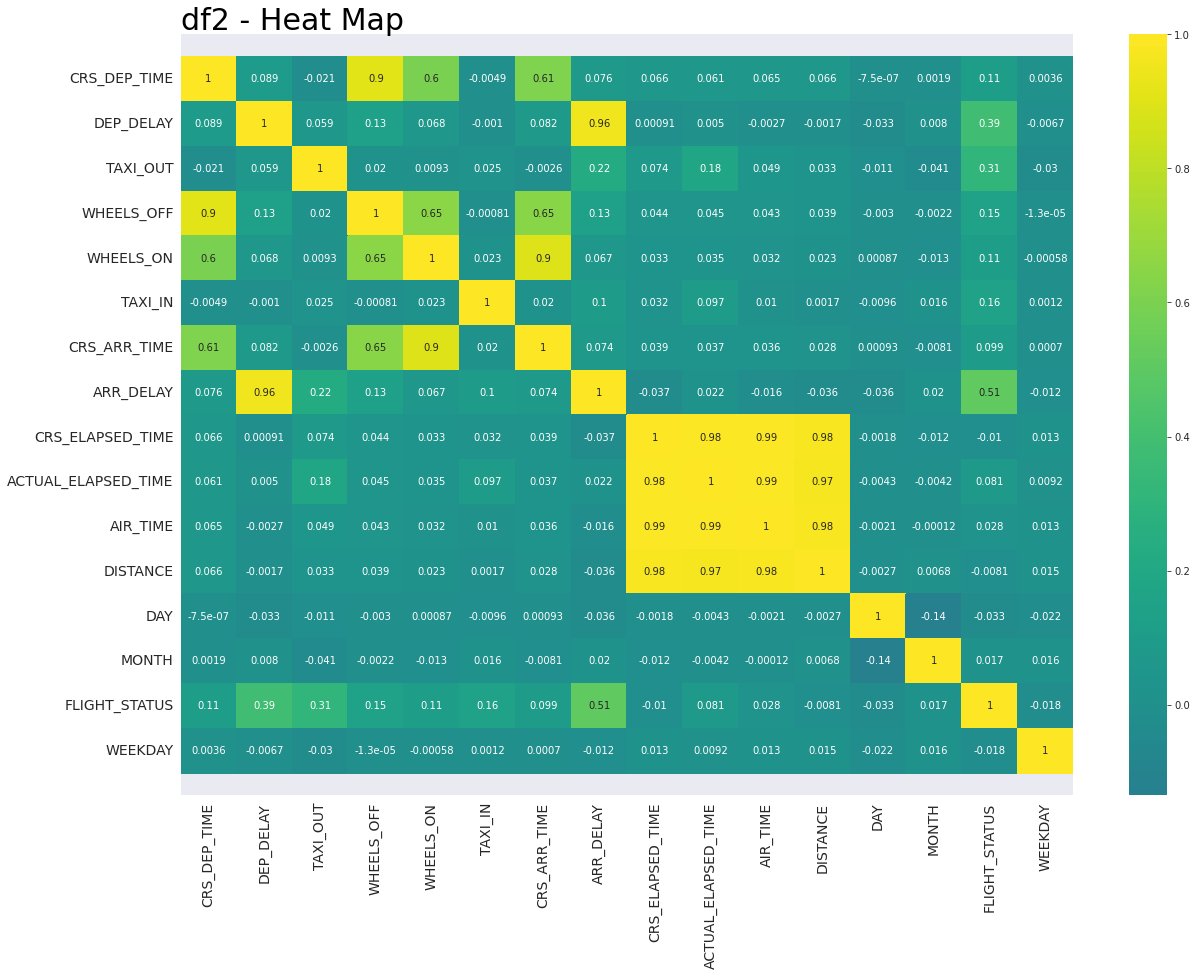

In [ ]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(dfm.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

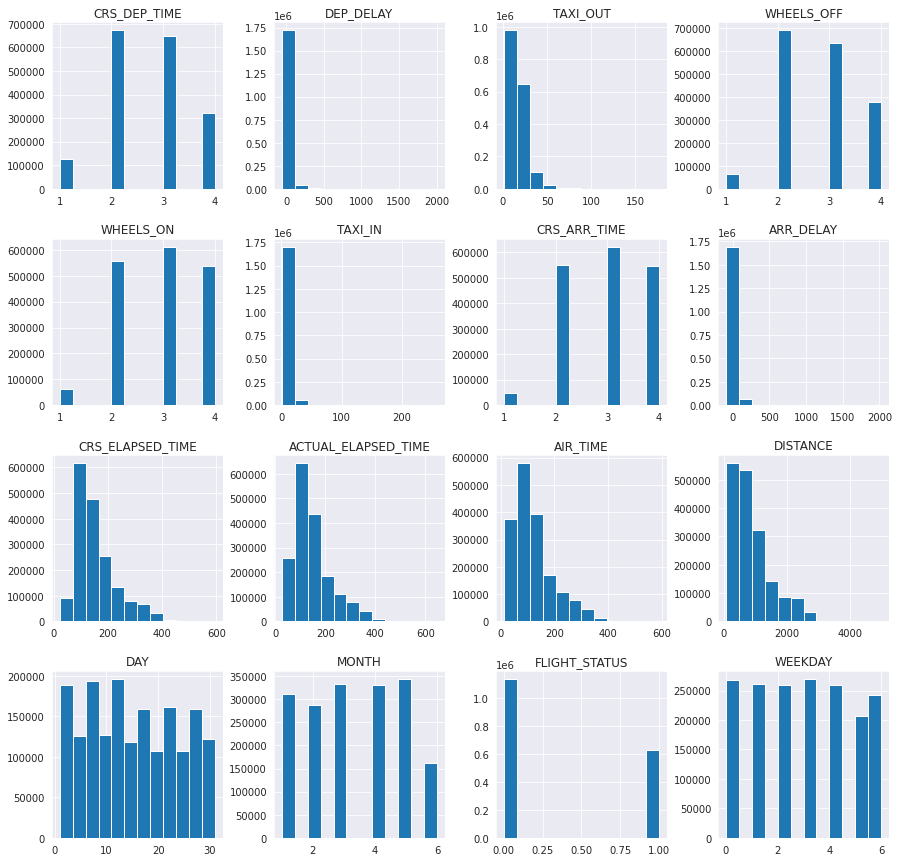

In [ ]:
dfm.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [ ]:
dfm_jan = dfm[(dfm['MONTH'] == 1)]
dfm_jan.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [ ]:
dfm_jan.MONTH.value_counts()

1    310659
Name: MONTH, dtype: int64

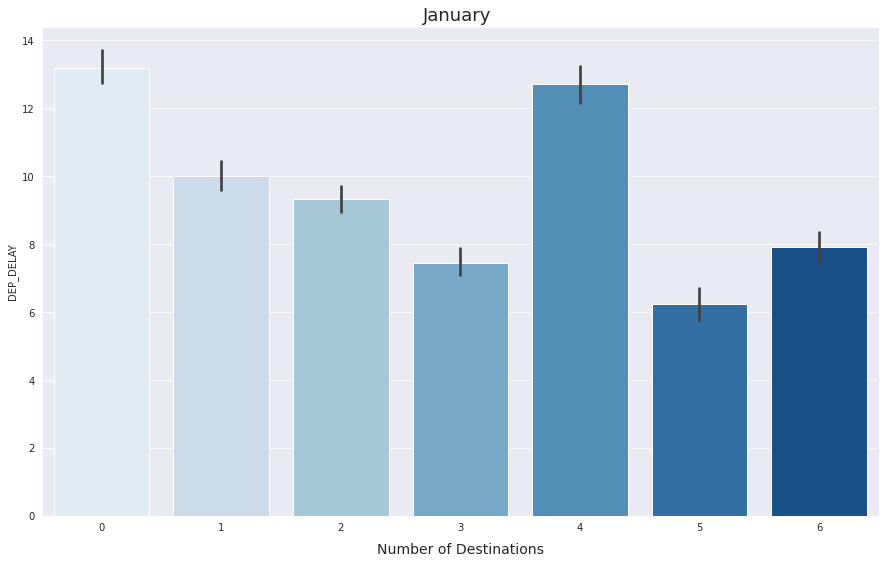

In [ ]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="WEEKDAY", y="DEP_DELAY", data=dfm_jan, palette="Blues")
plt.title('January ', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

### Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
dfm = pd.read_csv('dfm.csv', index_col=0)
dfm.head()

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0
2,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,0,0
3,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,1,1,0,0
6,United Airlines,Houston,Las Vegas,2,-3.0,14.0,2,2,6.0,2,-16.0,206.0,193.0,173.0,1222.0,1,1,0,0


In [ ]:
dfm.CRS_DEP_TIME.value_counts(normalize=True)

2    0.380562
3    0.366881
4    0.181596
1    0.070961
Name: CRS_DEP_TIME, dtype: float64

In [ ]:
dfm.CRS_ARR_TIME.value_counts(normalize=True)

3    0.352018
2    0.311697
4    0.308442
1    0.027843
Name: CRS_ARR_TIME, dtype: float64

In [ ]:
dfm.WEEKDAY.value_counts(normalize=True)

3    0.152275
0    0.151990
1    0.147747
2    0.147006
4    0.146947
6    0.136927
5    0.117107
Name: WEEKDAY, dtype: float64

In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767251 entries, 0 to 3208332
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OP_CARRIER           object 
 1   ORIGIN               object 
 2   DEST                 object 
 3   CRS_DEP_TIME         int64  
 4   DEP_DELAY            float64
 5   TAXI_OUT             float64
 6   WHEELS_OFF           int64  
 7   WHEELS_ON            int64  
 8   TAXI_IN              float64
 9   CRS_ARR_TIME         int64  
 10  ARR_DELAY            float64
 11  CRS_ELAPSED_TIME     float64
 12  ACTUAL_ELAPSED_TIME  float64
 13  AIR_TIME             float64
 14  DISTANCE             float64
 15  DAY                  int64  
 16  MONTH                int64  
 17  FLIGHT_STATUS        int64  
 18  WEEKDAY              int64  
dtypes: float64(8), int64(8), object(3)
memory usage: 269.7+ MB


In [ ]:
dfm.shape

(1767251, 19)

In [ ]:
dfm.isna().sum()

OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
FLIGHT_STATUS          0
WEEKDAY                0
dtype: int64

In [ ]:
def scaling_check(data):
    
    case_count = dfm['FLIGHT_STATUS'].value_counts() # 'data' is our input which will be any of the 3 dataframes created
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
0    1135893
1     631358
Name: FLIGHT_STATUS, dtype: int64


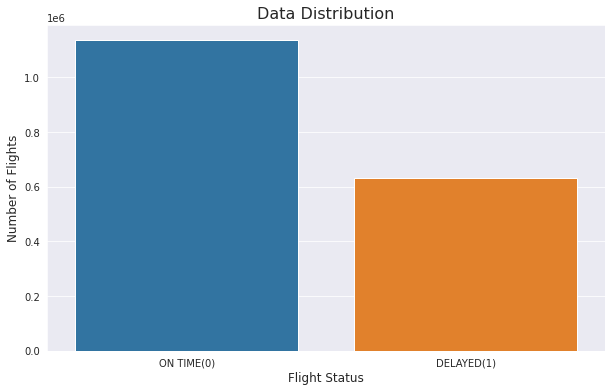

In [ ]:
scaling_check(dfm)

In [ ]:
dfm.FLIGHT_STATUS.value_counts(normalize=True)

0    0.642746
1    0.357254
Name: FLIGHT_STATUS, dtype: float64

In [ ]:
dfm.FLIGHT_STATUS.value_counts()

0    1135893
1     631358
Name: FLIGHT_STATUS, dtype: int64

In [ ]:
dfm.head(2)

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
0,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,0,0
1,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,0,0


In [ ]:
dfm.FLIGHT_STATUS.value_counts()

0    1135893
1     631358
Name: FLIGHT_STATUS, dtype: int64

In [ ]:
count_0 = 2518941
count_1 = 1489316

In [ ]:
print(count_0)
print(count_1)

2518941
1489316


In [ ]:
initial_bias = np.log([count_1/count_0])
initial_bias

weight_for_0 = (1/count_0)*(count_0 + count_1)/2.0
weight_for_1 = (1/count_1)*(count_0 + count_1)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.80
Weight for class 1: 1.35


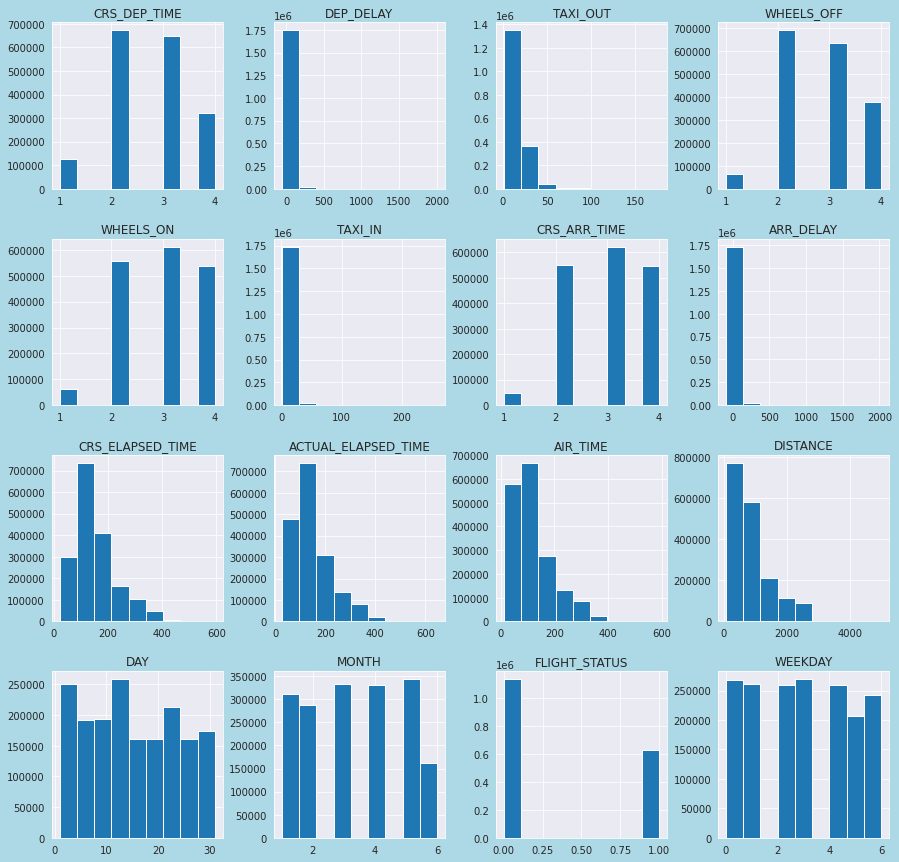

In [ ]:
dfm.hist(figsize  = [15, 15],bins=9) 
plt.show()

In [ ]:
dfm.DEP_DELAY.value_counts(normalize=True)

-5.0       7.747909e-02
-4.0       7.408116e-02
-3.0       7.151503e-02
-6.0       6.610719e-02
-2.0       6.450753e-02
               ...     
 1042.0    5.658506e-07
 991.0     5.658506e-07
 1352.0    5.658506e-07
 1152.0    5.658506e-07
 889.0     5.658506e-07
Name: DEP_DELAY, Length: 1267, dtype: float64

In [ ]:
dfm_test=dfm[(dfm['DEP_DELAY'] > 1000)]
dfm_test

,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,FLIGHT_STATUS,WEEKDAY
7521,SkyWest Airlines,Eau Claire,Chicago,1,1041.0,18.0,4,4,7.0,2,1032.0,82.0,73.0,48.0,269.0,1,1,1,0
8227,SkyWest Airlines,Atlanta,Chicago,3,1140.0,26.0,2,2,13.0,3,1144.0,130.0,134.0,95.0,606.0,1,1,1,0
14275,American Airlines,Eagle,Dallas-Fort Worth,3,1144.0,17.0,2,3,14.0,4,1135.0,133.0,124.0,93.0,721.0,1,1,1,0
14636,American Airlines,Detroit,Dallas-Fort Worth,3,1013.0,34.0,2,2,8.0,4,1001.0,189.0,177.0,135.0,986.0,1,1,1,0
21972,Spirit Airlines,Detroit,Denver,3,1332.0,48.0,3,3,9.0,4,1345.0,202.0,215.0,158.0,1123.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122546,SkyWest Airlines,Jacksonville,Atlanta,4,1147.0,28.0,3,3,13.0,4,1157.0,100.0,110.0,69.0,399.0,11,6,1,0
3138580,Delta Airlines,Orlando,Detroit,3,1020.0,15.0,2,2,7.0,4,1008.0,162.0,150.0,128.0,957.0,11,6,1,0
3172825,SkyWest Airlines,Columbus,Detroit,4,1032.0,16.0,3,3,5.0,4,1017.0,69.0,54.0,33.0,155.0,13,6,1,2
3193185,American Airlines,Jackson,Dallas-Fort Worth,3,1336.0,25.0,2,3,14.0,3,1342.0,164.0,170.0,131.0,1047.0,14,6,1,3


### Categoricals

In [ ]:
dfm.columns

Index(['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DAY', 'MONTH', 'FLIGHT_STATUS', 'WEEKDAY'],
      dtype='object')

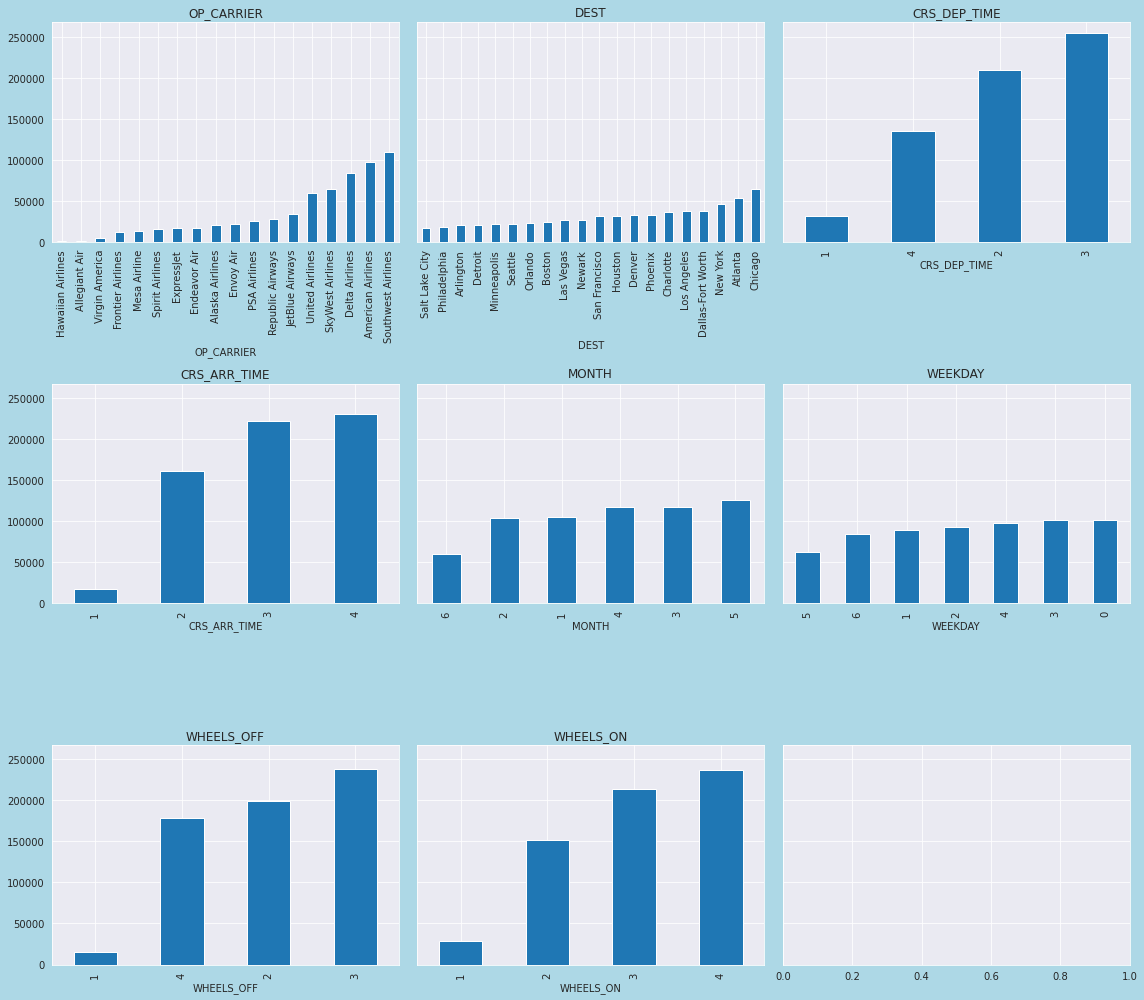

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,14), sharey=True)

categoricals = ['OP_CARRIER', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'WHEELS_OFF', 'WHEELS_ON']

for col, ax in zip(categoricals, axes.flatten()):
    (dfm.groupby(col).sum()['FLIGHT_STATUS'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

In [ ]:
OP_CARRIER_dummies = pd.get_dummies(dfm['OP_CARRIER'], prefix='OP_CARRIER', drop_first=True)
DEST_dummies = pd.get_dummies(dfm['DEST'], prefix='DEST', drop_first=True)
CRS_DEP_TIME_dummies = pd.get_dummies(dfm['CRS_DEP_TIME'], prefix='CRS_DEP_TIME', drop_first=True)
CRS_ARR_TIME_dummines = pd.get_dummies(dfm['CRS_ARR_TIME'], prefix='CRS_ARR_TIME', drop_first=True) 
MONTH_dummies = pd.get_dummies(dfm['MONTH'], prefix='MONTH', drop_first=True)
WEEKDAY_dummies = pd.get_dummies(dfm['WEEKDAY'], prefix='WEEKDAY', drop_first=True)

In [ ]:
dfm = dfm.drop(['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'MONTH', 'WEEKDAY', 'ACTUAL_ELAPSED_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'ARR_DELAY', 'TAXI_IN', 'TAXI_OUT'], axis=1)

In [ ]:
dfm = pd.concat([dfm, OP_CARRIER_dummies, DEST_dummies, CRS_DEP_TIME_dummies, CRS_ARR_TIME_dummines, MONTH_dummies, WEEKDAY_dummies], axis=1)

In [ ]:
dfm.head(2)

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-8.0,99.0,65.0,414.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfm.shape

(1767251, 59)

In [ ]:
dfm.to_csv('dfm_ready.csv')

### AdaBoost with DEP_DELAY

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
dfm_ready = pd.read_csv('dfm_ready.csv', index_col=0)
dfm_ready.head()

,DEP_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,FLIGHT_STATUS,OP_CARRIER_Allegiant Air,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,OP_CARRIER_Virgin America,DEST_Atlanta,DEST_Boston,DEST_Charlotte,DEST_Chicago,DEST_Dallas-Fort Worth,DEST_Denver,DEST_Detroit,DEST_Houston,DEST_Las Vegas,DEST_Los Angeles,DEST_Minneapolis,DEST_New York,DEST_Newark,DEST_Orlando,DEST_Philadelphia,DEST_Phoenix,DEST_Salt Lake City,DEST_San Francisco,DEST_Seattle,CRS_DEP_TIME_2,CRS_DEP_TIME_3,CRS_DEP_TIME_4,CRS_ARR_TIME_2,CRS_ARR_TIME_3,CRS_ARR_TIME_4,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
0,-5.0,268.0,225.0,1605.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,-8.0,99.0,65.0,414.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-5.0,134.0,106.0,846.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,190.0,157.0,1120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,-3.0,206.0,173.0,1222.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfm_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767251 entries, 0 to 3208332
Data columns (total 59 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   DEP_DELAY                      float64
 1   CRS_ELAPSED_TIME               float64
 2   AIR_TIME                       float64
 3   DISTANCE                       float64
 4   DAY                            int64  
 5   FLIGHT_STATUS                  int64  
 6   OP_CARRIER_Allegiant Air       int64  
 7   OP_CARRIER_American Airlines   int64  
 8   OP_CARRIER_Delta Airlines      int64  
 9   OP_CARRIER_Endeavor Air        int64  
 10  OP_CARRIER_Envoy Air           int64  
 11  OP_CARRIER_ExpressJet          int64  
 12  OP_CARRIER_Frontier Airlines   int64  
 13  OP_CARRIER_Hawaiian Airlines   int64  
 14  OP_CARRIER_JetBlue Airways     int64  
 15  OP_CARRIER_Mesa Airline        int64  
 16  OP_CARRIER_PSA Airlines        int64  
 17  OP_CARRIER_Republic Airways    int64  
 18  OP

In [ ]:
# Instantiate an AdaBoosClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)
                                 
# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
# Define features (X) and traget(y)
y = dfm_ready['FLIGHT_STATUS']
X = dfm_ready.drop(['FLIGHT_STATUS'], axis = 1)

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Using the models to predict labels on both training and test sets

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [ ]:
# Calculating the accuracy and f1-score for each model:

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
print('----------------------------')
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
print('----------------------------')
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
----------------------------
Model: AdaBoost
Accuracy: 0.8198015902655649
F1-Score: 0.6944855903910359

Model: Gradient Boosted Trees
Accuracy: 0.8355910758624123
F1-Score: 0.7244970719422277

Testing Metrics
----------------------------
Model: AdaBoost
Accuracy: 0.8203876756211909
F1-Score: 0.6949085424070269

Model: Gradient Boosted Trees
Accuracy: 0.8357026130230157
F1-Score: 0.7241533936456704


### Confusion Matrix

In [ ]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[816252,  35851],
       [202214, 271121]])

In [ ]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[821832,  30271],
       [187495, 285840]])

In [ ]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87    852103
           1       0.88      0.57      0.69    473335

    accuracy                           0.82   1325438
   macro avg       0.84      0.77      0.78   1325438
weighted avg       0.83      0.82      0.81   1325438



In [ ]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88    852103
           1       0.90      0.60      0.72    473335

    accuracy                           0.84   1325438
   macro avg       0.86      0.78      0.80   1325438
weighted avg       0.85      0.84      0.83   1325438



In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.8187903115805211


In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.7826612920204784


### AdaBoost without DEP_DELAY

In [ ]:
# Define features (X) and traget(y)
y = dfm_ready['FLIGHT_STATUS']
X = dfm_ready.drop(['FLIGHT_STATUS', 'DEP_DELAY'], axis = 1)

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Using the models to predict labels on both training and test sets

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [ ]:
# Calculating the accuracy and f1-score for each model:

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.6577239691905852
F1-Score: 0.1833695147371718

Model: Gradient Boosted Trees
Accuracy: 0.6742309529144683
F1-Score: 0.2459673405665369

Testing Metrics
Model: AdaBoost
Accuracy: 0.6583499190456287
F1-Score: 0.1837733781309031

Model: Gradient Boosted Trees
Accuracy: 0.674716584253658
F1-Score: 0.24531541829091758


### Confusion Matrix

In [ ]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[821624,  30479],
       [422357,  50978]])

In [ ]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[824222,  27881],
       [403262,  70073]])

In [ ]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

           0       0.66      0.96      0.78    852103
           1       0.63      0.11      0.18    473335

    accuracy                           0.66   1325438
   macro avg       0.64      0.54      0.48   1325438
weighted avg       0.65      0.66      0.57   1325438



In [ ]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

           0       0.67      0.97      0.79    852103
           1       0.72      0.15      0.25    473335

    accuracy                           0.67   1325438
   macro avg       0.69      0.56      0.52   1325438
weighted avg       0.69      0.67      0.60   1325438



In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, X, y, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.6412648777242274


In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, X, y, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.5694612222225793
